In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from math import sqrt

from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
#from keras.datasets import mnist

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [81]:
currency_list = [#'USDCHF10080',
                 #'GBPUSD10080', 'EURUSD10080', 'USDJPY10080', 'USDCAD10080', 'AUDUSD10080', 'NZDUSD10080',
                 #'GBPCHF10080', 'EURCHF10080', 'CHFJPY10080', 'CADCHF10080', 'AUDCHF10080', 'NZDCHF10080', 'EURGBP10080',
                 #'GBPJPY10080', 'GBPCAD10080', 'GBPAUD10080', 'EURJPY10080', 'EURCAD10080', 'EURAUD10080', 'EURNZD10080',
                #'CADJPY10080', 'AUDJPY10080', 'NZDJPY10080', 'AUDCAD10080', 'NZDCAD10080', 
                'AUDNZD10080'
                ]



# for q in currency_list:
    
#     errors = []
    
#     for x in range(5):

#         currency = q.replace('10080','')

#         data = pd.read_excel('files/currency_training_data/' + currency +'_combine_data_dataframe.xlsx', sheet_name=0)
#         #data = data.head(695)


#         X = data.drop(columns=['Unnamed: 0', 
#                                'date_start',  'nextweek_class',


#                               ])



#         y = data['nextweek_class']

#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )



#         lnr= LinearRegression()
#         lnr.fit(X_train, y_train)
#         y_predict = lnr.predict(X_test)
        
        
#         error = sqrt(mean_squared_error(y_test, y_pred))
#         errors.append(error)
       
        
#     average_error = sum(errors)/len(errors)
       
#     print(q + " Linear regression Average " + str(average_error))
    
    
   


(1429, 4, 1) (1429,)
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_174 (LSTM)              (None, 4, 100)            40800     
_________________________________________________________________
lstm_175 (LSTM)              (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
33/33 [==============================] - 3s 23ms/step - loss: 221.4101 - val_loss: 201.6375
Epoch 2/20
33/33 [==============================] - 0s 8ms/step - loss: 220.9620 - val_loss: 202.2189
Epoch 3/20
33/33 [==============================] - 0s 9ms/step - loss: 220.4920 - val_loss: 202.5220
Epoch 4/20
33/33 [==============================] - 0s 8ms/step - loss: 220.1016 - val_loss: 203.3078
Epoch 5/20
33/33 [==============================] - 0s 8ms/step - loss: 219.

7/7 [==============================] - 0s 4ms/step - loss: 232.9074
(1429, 4, 1) (1429,)
Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_180 (LSTM)              (None, 4, 100)            40800     
_________________________________________________________________
lstm_181 (LSTM)              (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
33/33 [==============================] - 3s 22ms/step - loss: 221.0322 - val_loss: 237.4338
Epoch 2/20
33/33 [==============================] - 0s 8ms/step - loss: 220.8177 - val_loss: 237.2253
Epoch 3/20
33/33 [==============================] - 0s 8ms/step - loss: 220.6994 - val_loss: 237.0251
Epoch 4/20
33/33 [==============================] - 0s 8ms/step - loss: 220.6031 - val_loss: 237.0628
Epoch 5/

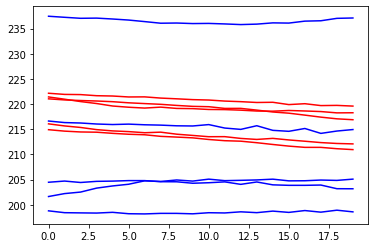

In [82]:
for q in currency_list:
    
    errors = []
    
    for x in range(5):

        currency = q.replace('10080','')

        data = pd.read_excel('files/currency_training_data/' + currency +'_combine_data_dataframe.xlsx', sheet_name=0)
        #data = data.head(695)


        X = data.drop(columns=['Unnamed: 0', 
                               'date_start',  'nextweek_class',


                              ])



        y = data['nextweek_class']
      
    
        

        #print(X.shape)
        
        
        # after scaling the df, resulted in "scaled_dataset"
        
        
        
        sequences = 4
        
        
        
        result = []
        # for loop will walk for each of the 1500 rows
        for i in range(0,len(X)):
            # every group must have the same length, so if current loop position i + number 
            # of sequences is higher than df length, breaks
            if i+sequences <= len(X):
                # this will add into the list as [[R1a,R1b...R1t],[R2a,R2b...R2t],...[R5a,R5b...R5t]]
                result.append(X[i:i+sequences].values)
        # Converting to array + keras takes float32 better than 64
        train_x = np.array(result)
        #train_x  = train_x.astype('float32')
        # making the y into same length as X
        train_y = np.array(y.head(len(train_x)).values)

        print(train_x.shape, train_y.shape)
        #print(train_x[len(train_x)-10])
        #print(train_y[len(train_x)-10])
        
        X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.15 )
        
        X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size = 0.15 )
       
        
       
        #Initializing the classifier Network
        classifier = Sequential()

        #Adding the input LSTM network layer
        #classifier.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
        classifier.add(LSTM(100, input_shape=(train_x.shape[1:]), return_sequences=True))
        #classifier.add(LSTM(100,  return_sequences=True),)
        #classifier.add(LSTM(100,  return_sequences=True), )
        #classifier.add(LSTM(100,  return_sequences=True))
      
        #classifier.add(Dense(units = 1))
        classifier.add(LSTM(1,  return_sequences=False))
        #classifier.add(Dropout(0.2))
        #Adding a second LSTM network layer
        
        #classifier.add(LSTM(128))
        #Adding a dense hidden layer
        #classifier.add(Dense(64, activation='relu'))
        #classifier.add(Dropout(0.2))

        #Adding the output layer
        #classifier.add(Dense(35, activation='softmax'))
      
        #Compiling the network
        classifier.compile( loss='mean_squared_error',
                      optimizer=Adam(learning_rate=0.001, decay=1e-6),
                      )
        
        print(classifier.summary())

        #Fitting the data to the model
        history = classifier.fit(X_train,
                 y_train,
                  epochs=20,
                  validation_data=(X_val, y_val))        
     
        val_loss  = classifier.evaluate(X_test, y_test)
        error = sqrt(val_loss)
        errors.append(error)
        plt.plot(history.history['loss'],'red')
        plt.plot(history.history['val_loss'], 'blue')
    average_error = sum(errors)/len(errors)
    print(errors)
    print(q , "------------------------ RNN " , average_error)
